In [1]:
"""PLOT CARTESIAN ELLIPSE BY DIRECT PLOT"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#Yo


In [2]:
#Parameters

#Artery wall - Blue
a_wall_in=5
b_wall_in= 3
thick_wall = 1.1

#Lumen - Red
x_L= -1
R_L = 2.2

#Lipid mass - Green
x_lip = 1.5
y_lip = 1.5
a_lip = 0.2
b_lip = 0.5
alpha_lip = np.pi/4 #angle in rad

#Calcium mass - Yellow
x_cal = 2
y_cal = -1.2
a_cal = 0.3
b_cal = 0.9
alpha_cal = np.pi/3 #angle in rad

In [3]:
#Graphs

#Abscisse
x = np.linspace(-10,10,200000)



#Artery wall - inside layer - ellipse centered on 0 with main axis a_wall_in and small axis b_wall_in
def artery_wall(a_wall_in, b_wall_in,thick_wall):
    y_wall_in = +(b_wall_in/a_wall_in)*np.sqrt(a_wall_in**2-x**2) #Positive part
    z_wall_in = -(b_wall_in/a_wall_in)*np.sqrt(a_wall_in**2-x**2) #Negative part

    #Artery wall - outside layer - ellipse centered on 0 with main axis a_wall_out and small axis b_wall_out
    a_wall_out=a_wall_in*thick_wall
    b_wall_out=b_wall_in*thick_wall
    y_wall_out = +(b_wall_out/a_wall_out)*np.sqrt(a_wall_out**2-x**2) 
    z_wall_out = -(b_wall_out/a_wall_out)*np.sqrt(a_wall_out**2-x**2) 
    return y_wall_in,z_wall_in,y_wall_out,z_wall_out

#Lumen - circle centered in x_L, radius R_L
def lumen(x_L,R_L):
    y_lumen = +np.sqrt(R_L**2 - (x-x_L)**2)
    z_lumen = -np.sqrt(R_L**2 - (x-x_L)**2)
    return y_lumen,z_lumen

#Calcium mass - ellipse centered on x_cal,y_cal with main axis a_cal and small axis b_cal, angle of rotation alpha_cal
def calcium(x_cal,y_cal,a_cal,b_cal,alpha_cal):
    A = (b_cal**2)*(np.sin(alpha_cal)**2)+(a_cal**2)*(np.cos(alpha_cal)**2)
    B = 2*(x-x_cal)*np.cos(alpha_cal)*np.sin(alpha_cal)*((b_cal**2)+(a_cal**2))
    C = ((x-x_cal)**2)*((b_cal**2)*(np.cos(alpha_cal)**2)+(a_cal**2)*(np.sin(alpha_cal)**2))-(a_cal**2)*(b_cal**2)
    y_calcium = y_cal + (-B+np.sqrt(-4*A*C))/(2*A)
    z_calcium = y_cal + (-B-np.sqrt(-4*A*C))/(2*A)
    return y_calcium,z_calcium

#Lipid mass - ellipse centered on x_lip,y_lip with main axis a_lip and small axis b_lip, angle of rotation alpha_lip
def lipid(x_lip,y_lip,a_lip,b_lip,alpha_lip):
    A = (b_lip**2)*(np.sin(alpha_lip)**2)+(a_lip**2)*(np.cos(alpha_lip)**2)
    B = 2*(x-x_lip)*np.cos(alpha_lip)*np.sin(alpha_lip)*((b_lip**2)+(a_lip**2))
    C = ((x-x_lip)**2)*((b_lip**2)*(np.cos(alpha_lip)**2)+(a_lip**2)*(np.sin(alpha_lip)**2))-(a_lip**2)*(b_lip**2)
    y_lipid = y_lip + (-B+np.sqrt(-4*A*C))/(2*A)
    z_lipid = y_lip + (-B-np.sqrt(-4*A*C))/(2*A)
    return y_lipid,z_lipid


In [20]:
#Parameters Verification - avoid intersections

def check(y_1,y_2):
    intersect = np.argwhere(np.diff(np.sign(y_1 - y_2)) != 0).reshape(-1) + 0
    if (intersect!=[]):
        x_intersect = []
        y_intersect = []
        for idx in intersect:
            if np.isnan(y_1[idx])==False & np.isnan(y_2[idx])==False:
                x_intersect.append(x[idx])
                y_intersect.append(y_2[idx])
        if len(x_intersect)%2!=0:
            x_intersect=x_intersect[:-1]
            y_intersect=y_intersect[:-1]
        if y_intersect != []:
            #plt.plot(x_intersect, y_intersect, 'bo') #uncomment to add red dots on the plot to see the crossing part
            return True
            

In [24]:
#plots
def artery_plot(a_wall_in, b_wall_in, thick_wall,
                x_L, R_L,
                x_cal, y_cal, a_cal, b_cal, alpha_cal,
                x_lip, y_lip, a_lip, b_lip, alpha_lip):
    
    plt.gcf().clear() #flush the previous plot if still loaded
    
    y_wall_in,z_wall_in,y_wall_out,z_wall_out = artery_wall(a_wall_in, b_wall_in, thick_wall)
    plt.plot(x,y_wall_in,'b-')
    plt.plot(x,z_wall_in,'b-')
    plt.plot(x,y_wall_out,'b-')
    plt.plot(x,z_wall_out,'b-')

    y_lumen,z_lumen = lumen(x_L,R_L)
    plt.plot(x,y_lumen,'r-')
    plt.plot(x,z_lumen,'r-')
    
    y_calcium,z_calcium = calcium(x_cal,y_cal,a_cal,b_cal,alpha_cal)
    plt.plot(x,y_calcium,'g-')
    plt.plot(x,z_calcium,'g-')
    
    y_lipid,z_lipid = lipid(x_lip,y_lip,a_lip,b_lip,alpha_lip)
    plt.plot(x,y_lipid,'y-')
    plt.plot(x,z_lipid,'y-')
    
    plot_limit = a_wall_in*thick_wall*1.1
    plt.xlim([-plot_limit,plot_limit])
    plt.ylim([-plot_limit,plot_limit])
    plt.gca().set_aspect('equal', adjustable='box')
    

    #verifications
    if check(y_lumen,y_wall_in):
        ##Uncomment two next lines if you want to plot the artery anyway with a red alert patch
        #red_patch = mpatches.Patch(color='red', label='crossing') 
        #plt.legend(handles=[red_patch])
        return False #stop the process, don't plot. Comment if you want to see the plot anyway
    elif check(y_lipid,y_wall_in):
        return False
#    elif check(y_lipid,y_lumen):
#        return False
#    elif check(y_lipid,y_calcium):
#        return False
#    elif check(y_calcium,y_wall_in):
#        return False
#    elif check(y_calcium,y_lumen):
#        return False
    
    

        
    plt.show()
    #print("a_wall_in=%f, b_wall_in=%f, thick_wall=%f,x_L=%f, R_L=%f, x_M=%f,a_M=%f,b_M=%f"%(a_wall_in, b_wall_in, thick_wall,x_L, R_L, x_M,a_M,b_M))

/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in

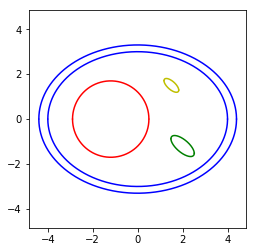

intersection: None 


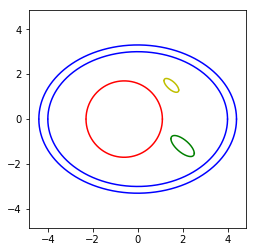

intersection: None 


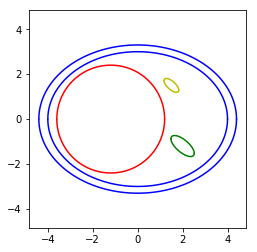

intersection: None 


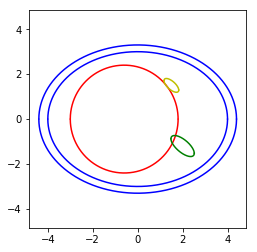

intersection: None 


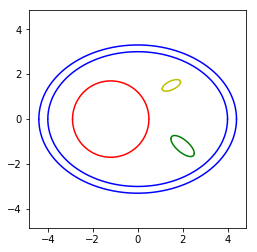

intersection: None 


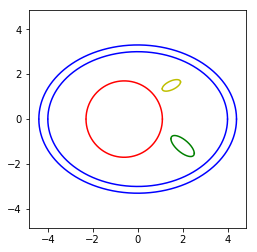

intersection: None 


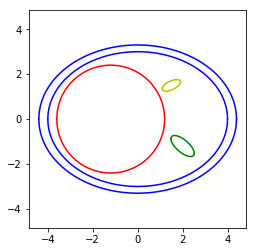

intersection: None 


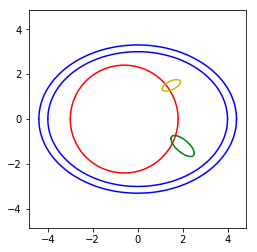

intersection: None 


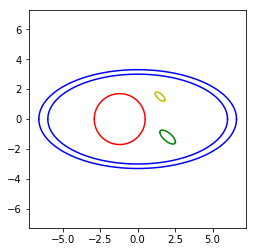

intersection: None 


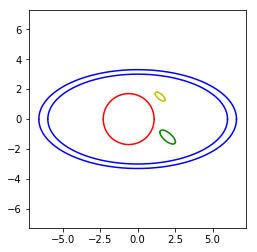

intersection: None 


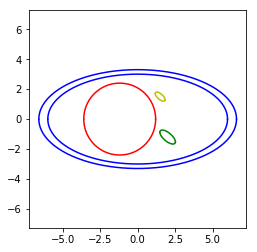

intersection: None 


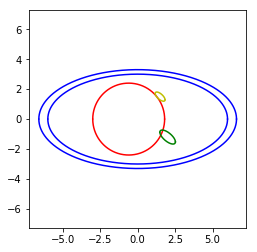

intersection: None 


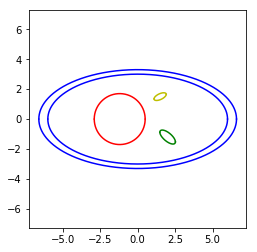

intersection: None 


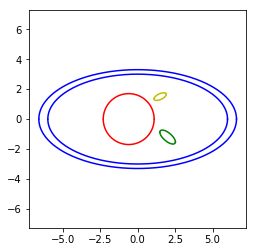

intersection: None 


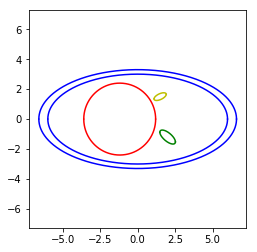

intersection: None 


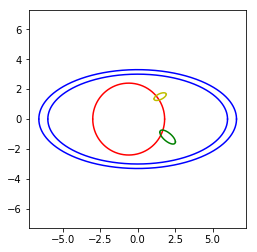

intersection: None 
Time to generate 16 plots : 73.881194 seconds 


In [25]:
import time 
count = 0
t1 = time.time()
for a_wall_in in [4,6]:
    for alpha_lip in [np.pi/3,8*np.pi/5]:
        for R_L in [1.7,2.4]:
            for x_L in [-1.2,-0.6]:
                plot = artery_plot(a_wall_in, b_wall_in, thick_wall,x_L, R_L,x_cal, y_cal, a_cal, b_cal, alpha_cal,x_lip, y_lip, a_lip, b_lip, alpha_lip)  #will plot only if there is no crossing add return +1 to count
                if plot != False:
                    count +=1
                print ("intersection: %r " % plot)
print("Time to generate %d plots : %f seconds "%(count, time.time()-t1))

/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: elementwise != comparison

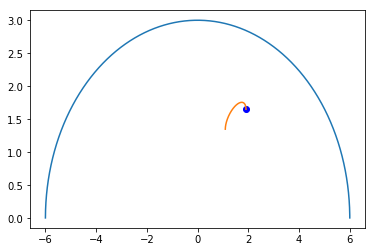

In [23]:
y_1,_,_,_ = artery_wall(a_wall_in, b_wall_in,thick_wall)
y_2,_ = lipid(x_lip,y_lip,a_lip,b_lip,alpha_lip)
intersect = np.argwhere(np.diff(np.sign(y_1 - y_2)) != 0).reshape(-1) + 0
if (intersect!=[]):
    x_intersect = []
    y_intersect = []
    for idx in intersect:
        if np.isnan(y_1[idx])==False & np.isnan(y_2[idx])==False:
            x_intersect.append(x[idx])
            y_intersect.append(y_2[idx])
    if len(x_intersect)%2!=0:
        x_intersect=x_intersect[:-1]
        y_intersect=y_intersect[:-1]
    if y_intersect != []:
        plt.plot(x_intersect, y_intersect, 'bo')
plt.plot(x,y_1)
plt.plot(x,y_2)
plt.show()

In [51]:
if (4==4 or 3==2):
    print ('ok')

ok


In [66]:
artery_plot(a_wall_in, b_wall_in, thick_wall, x_L, R_L,x_cal, y_cal, a_cal,b_cal, alpha_cal,x_lip, y_lip, a_lip, b_lip, alpha_lip)

/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in

ValueError: x and y must have same first dimension, but have shapes (200000,) and (1,)

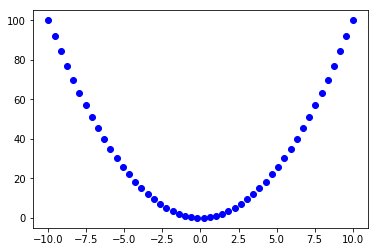

In [29]:
j = np.linspace(-10,10,50)
d = j**2
plt.plot(j,d,'bo')
plt.show()